In [307]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import glob
import pandas as pd
import math
import os
import re
import matplotlib.pyplot as plt


import sqlalchemy as db

In [3]:
from pyarrow.parquet import ParquetFile

In [3]:
url = "https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
else:
    print("Failure")

Success


In [4]:
import re
results_page = BeautifulSoup(response.content,'lxml')

#### get data from January 2009 through June 2015

In [5]:
def get_taxi_link():
    link_array = []
    pattern = r"(http.*yellow_tripdata_(20[0|1][0-9])-(0?\d*).parquet)"
    # pattern = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-01.parquet"
    match = re.findall(pattern, str(results_page))
    for i in match:
        if int(i[1]) < 2015:
            link_array.append(i[0])
        elif int(i[1]) == 2015 and int(i[2]) <= 6:
            link_array.append(i[0])
    return link_array

In [6]:
link = get_taxi_link()
link

['https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-01.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-02.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-03.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-04.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-05.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2015-06.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-01.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-02.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-03.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-04.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-05.parquet',
 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2014-06.pa

In [7]:
pattern = r"yellow.*.parquet"
match = re.search(pattern, link[0])
match.group()

'yellow_tripdata_2015-01.parquet'

In [8]:
import os

if os.path.exists("yellow_tripdata_2009-01.parquet"):
    print("true")
else:
    print("doesn't exist")

true


download data to local folder

In [ ]:
import os

pattern = r"yellow.*.parquet"
for taxi_data_url in link:
    match = re.search(pattern, taxi_data_url)
    name_of_file = match.group()
    
    # to make sure we're not re-downloading the same file again
    if not os.path.exists(name_of_file):
        response = requests.get(taxi_data_url, stream=True)
        with open(name_of_file, 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                if chunk:
                    f.write(chunk)
                

In [ ]:
link[0]

#### get all column names to normalize columns

In [ ]:
import os
import re

import pandas as pd
from pyarrow.parquet import ParquetFile

pattern = r"yellow.*.parquet"
parquet_column_list = []

for file in os.listdir():
    match = re.match(pattern, file)
    if match:
        file_name = match.group()
        df = pd.read_parquet(file_name)
        column_name = df.columns.to_list()
        if column_name not in parquet_column_list:
            parquet_column_list.append(column_name)

In [ ]:
parquet_column_list

In [254]:
# we save the parquet column list so that later we don't need to 
parquet_column_list = [['VendorID',
  'tpep_pickup_datetime',
  'tpep_dropoff_datetime',
  'passenger_count',
  'trip_distance',
  'RatecodeID',
  'store_and_fwd_flag',
  'PULocationID',
  'DOLocationID',
  'payment_type',
  'fare_amount',
  'extra',
  'mta_tax',
  'tip_amount',
  'tolls_amount',
  'improvement_surcharge',
  'total_amount',
  'congestion_surcharge',
  'airport_fee'],
 ['vendor_name',
  'Trip_Pickup_DateTime',
  'Trip_Dropoff_DateTime',
  'Passenger_Count',
  'Trip_Distance',
  'Start_Lon',
  'Start_Lat',
  'Rate_Code',
  'store_and_forward',
  'End_Lon',
  'End_Lat',
  'Payment_Type',
  'Fare_Amt',
  'surcharge',
  'mta_tax',
  'Tip_Amt',
  'Tolls_Amt',
  'Total_Amt'],
 ['vendor_id',
  'pickup_datetime',
  'dropoff_datetime',
  'passenger_count',
  'trip_distance',
  'pickup_longitude',
  'pickup_latitude',
  'rate_code',
  'store_and_fwd_flag',
  'dropoff_longitude',
  'dropoff_latitude',
  'payment_type',
  'fare_amount',
  'surcharge',
  'mta_tax',
  'tip_amount',
  'tolls_amount',
  'total_amount']]

In [6]:
uber_data = pd.read_csv('uber_rides_sample.csv', index_col=0)
uber_data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [7]:
# change the format of key to datetime
uber_data['key'] = pd.to_datetime(uber_data['key'])

examine how many rows are there for each year and month

In [12]:
examine_df = pd.concat([uber_data['key'].dt.year, uber_data['key'].dt.month], axis=1)
examine_df.columns = ['year', 'month']

In [13]:
examine_df.groupby(['year', 'month']).size()

year  month
2009  1        2555
      2        2292
      3        2703
      4        2574
      5        2660
               ... 
2015  2        2225
      3        2362
      4        2339
      5        2449
      6        2161
Length: 78, dtype: int64

In [14]:
# number of rows needed for each month
200000/78

2564.102564102564

#### according to the average number of rows in each month each year in the sample uber dataset, we do the following:
- sample 2600 columns from the yellow taxi dataset
- remove unecessary column and normalize the yellow taxi columns by mapping their names to match the uber dataset

In [258]:
import geopandas as gpd
shapefile = gpd.read_file("taxi_zones/taxi_zones.shp")
shapefile

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


In [259]:
shapefile = shapefile.to_crs(4326)
shapefile['longitude'] = shapefile.centroid.x  
shapefile['latitude'] = shapefile.centroid.y
column_to_remove = ['Shape_Leng','Shape_Area','OBJECTID','geometry','zone','borough']
shapefile_new = shapefile.drop(columns=column_to_remove)


/var/folders/sl/ygvmf08n6s5cz73c1jv6rbnw0000gn/T/ipykernel_37224/4106857179.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile['longitude'] = shapefile.centroid.x
/var/folders/sl/ygvmf08n6s5cz73c1jv6rbnw0000gn/T/ipykernel_37224/4106857179.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shapefile['latitude'] = shapefile.centroid.y


In [260]:
shapefile_new.loc[56, 'LocationID'] = 57
shapefile_new.loc[103, 'LocationID'] = 104
shapefile_new.loc[104, 'LocationID'] = 105

In [261]:
shapefile_new

,LocationID,longitude,latitude
0,1,-74.174000,40.691831
1,2,-73.831299,40.616745
2,3,-73.847422,40.864474
3,4,-73.976968,40.723752
4,5,-74.188484,40.552659
...,...,...,...
258,259,-73.852215,40.897932
259,260,-73.906306,40.744235
260,261,-74.013023,40.709139
261,262,-73.946510,40.775932


In [256]:
def get_center_long(locationid):
    if locationid in shapefile_new['LocationID']:
        return shapefile_new[shapefile_new['LocationID']==locationid]['longitude'].values[0]

def get_center_lat(locationid):
    if locationid in shapefile_new['LocationID']:
        return shapefile_new[shapefile_new['LocationID']==locationid]['latitude'].values[0]


#### find a file with LocationID instead of longitude to test if the get_center_long functions work or not

In [20]:
import os
import re

pattern = r"yellow.*.parquet"
for file in os.listdir():
    match = re.match(pattern, file)
    if match:
        file_name = match.group()
        df = pd.read_parquet(file_name)
        column_name = df.columns.to_list()
        if parquet_column_list.index(column_name) == 0:
            print(file_name)
        break

yellow_tripdata_2011-07.parquet


In [ ]:
import os
import re
yellow_taxi_data = pd.DataFrame()
pattern = r"yellow.*2011-07.parquet"

match = re.match(pattern, file)
pd.read_parquet(file_name)

In [262]:
import os
import re
yellow_taxi_data = pd.DataFrame()


pattern = r"yellow.*2011-07.parquet"

count = 0
for file in os.listdir():
    match = re.match(pattern, file)
    if match:
        file_name = match.group()
        df = pd.read_parquet(file_name)
        sample_df = df.sample(3000)
        column_name = sample_df.columns.to_list()
        
        if parquet_column_list.index(column_name) == 0:
            sample_df_column_filtered = sample_df.loc[:,['fare_amount',
                                                         'tpep_pickup_datetime',
                                                          'passenger_count',
                                                          'PULocationID',
                                                          'DOLocationID']]
            #'PULocationID', 'DOLocationID' will be transformed to longitude and latitude
            #temp_df = sample_df_column_filteredPULocationID'] 
            sample_df_column_filtered = sample_df_column_filtered[sample_df_column_filtered['PULocationID'] != sample_df_column_filtered['DOLocationID']]
            sample_df_column_filtered['pickup_longitude'] = sample_df_column_filtered['PULocationID'].apply(get_center_long)
            sample_df_column_filtered['pickup_latitude'] = sample_df_column_filtered['PULocationID'].apply(get_center_lat)
            sample_df_column_filtered['dropoff_longitude'] = sample_df_column_filtered['DOLocationID'].apply(get_center_long)
            sample_df_column_filtered['dropoff_latitude'] = sample_df_column_filtered['DOLocationID'].apply(get_center_lat)
            
            sample_df_column_filtered = sample_df_column_filtered.dropna()
            sample_df_column_filtered = sample_df_column_filtered.drop(columns=['PULocationID','DOLocationID'])
            
            sample_df_column_filtered.columns = ['fare_amount', 'pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
            yellow_taxi_data = pd.concat([yellow_taxi_data, sample_df_column_filtered])
yellow_taxi_data




,fare_amount,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
7990345,6.1,2011-07-18 13:53:00,5,-73.999917,40.748428,-73.984196,40.759818
7319173,14.9,2011-07-16 23:06:00,5,-73.957012,40.780436,-74.008984,40.735035
9702698,3.3,2011-07-21 20:27:00,1,-73.968168,40.797962,-73.973049,40.791705
13549596,10.5,2011-07-29 14:35:05,1,-74.004015,40.753309,-73.996919,40.720889
13535138,5.7,2011-07-29 13:05:06,2,-73.984196,40.759818,-73.972356,40.756688
...,...,...,...,...,...,...,...
13170730,6.9,2011-07-28 20:26:19,1,-73.957012,40.780436,-73.937346,40.801169
1145977,6.1,2011-07-03 21:05:00,1,-73.977698,40.758028,-73.992438,40.748497
3681575,49.7,2011-07-09 15:29:00,6,-73.873629,40.774376,-73.984052,40.736824
3612171,5.7,2011-07-09 12:24:00,1,-73.984052,40.736824,-74.001538,40.723888


#### After testing it successfully on one file, we apply the function to the bigger function that will ingest every file

In [263]:
yellow_taxi_data = pd.DataFrame()
pattern = r"yellow.*.parquet"

count = 0
for file in os.listdir():
    match = re.match(pattern, file)
    if match:
        file_name = match.group()
        df = pd.read_parquet(file_name)
        sample_df = df.sample(2600)
        column_name = sample_df.columns.to_list()
        
        if parquet_column_list.index(column_name) == 0:
            sample_df_column_filtered = sample_df.loc[:,['tip_amount',
                                                         'fare_amount',
                                                         'tpep_pickup_datetime',
                                                         'passenger_count',
                                                         'PULocationID',
                                                         'DOLocationID']]
            #'PULocationID', 'DOLocationID' will be transformed to longitude and latitude
            sample_df_column_filtered = sample_df_column_filtered[sample_df_column_filtered['PULocationID'] != sample_df_column_filtered['DOLocationID']] 
            sample_df_column_filtered = sample_df_column_filtered[(sample_df_column_filtered['PULocationID']<=263)&(sample_df_column_filtered['DOLocationID']<=263)]
            sample_df_column_filtered['pickup_longitude'] = sample_df_column_filtered['PULocationID'].apply(get_center_long)
            sample_df_column_filtered['pickup_latitude'] = sample_df_column_filtered['PULocationID'].apply(get_center_lat)
            sample_df_column_filtered['dropoff_longitude'] = sample_df_column_filtered['DOLocationID'].apply(get_center_long)
            sample_df_column_filtered['dropoff_latitude'] = sample_df_column_filtered['DOLocationID'].apply(get_center_lat)
            sample_df_column_filtered = sample_df_column_filtered.drop(columns=['PULocationID','DOLocationID'])
            sample_df_column_filtered.columns = ['tip_amount', 'fare_amount', 'pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
        elif parquet_column_list.index(column_name) == 1:
            sample_df_column_filtered = sample_df.loc[:,[ 'Trip_Pickup_DateTime',            
                                                          'Passenger_Count',            
                                                          'Start_Lon',
                                                          'Start_Lat',              
                                                          'End_Lon',
                                                          'End_Lat',
                                                          'Fare_Amt',
                                                          'Tip_Amt']]
            sample_df_column_filtered.columns = ['pickup_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'tip_amount']
        elif parquet_column_list.index(column_name) == 2:
            sample_df_column_filtered = sample_df.loc[:,[ 'pickup_datetime',  
                                                          'passenger_count',
                                                          'pickup_longitude',
                                                          'pickup_latitude',
                                                          'dropoff_longitude',
                                                          'dropoff_latitude',  
                                                          'fare_amount',
                                                          'tip_amount']]
        yellow_taxi_data = pd.concat([yellow_taxi_data, sample_df_column_filtered])
        count += 1

In [267]:
yellow_taxi_data[yellow_taxi_data['pickup_longitude']==yellow_taxi_data['pickup_latitude']]

,tip_amount,fare_amount,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
793764,0.0,6.1,2009-10-21 06:23:04,1,0.0,0.0,0.000000,0.000000
3282331,0.0,4.1,2009-10-24 18:48:17,1,0.0,0.0,0.000000,0.000000
13096572,0.0,11.7,2009-10-31 22:10:08,1,0.0,0.0,0.000000,0.000000
3865938,0.0,3.3,2009-10-18 14:38:00,5,0.0,0.0,0.000000,0.000000
6611360,2.0,13.3,2009-10-27 20:19:00,4,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
377929,0.0,5.3,2009-05-31 22:41:02,4,0.0,0.0,0.000000,0.000000
6743244,0.0,11.3,2009-05-21 08:42:30,1,0.0,0.0,0.000000,0.000000
3593062,2.0,6.9,2009-05-16 13:43:22,1,0.0,0.0,0.000000,0.000000
6541494,0.0,45.0,2009-05-04 21:45:00,1,0.0,0.0,-73.970727,40.764472


according tho the above dataframe filtering, there're rows where pickup longitude and latitude are the same. Therefore, we will remove these in the final dataset

In [268]:
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['pickup_longitude']!=yellow_taxi_data['pickup_latitude']]


In [269]:
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['pickup_longitude'] > -74.242330]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['pickup_longitude'] < -73.717047]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['pickup_latitude'] > 40.560445]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['pickup_latitude'] < 40.908524]




yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['dropoff_longitude'] > -74.242330]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['dropoff_longitude'] < -73.717047]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['dropoff_latitude'] > 40.560445]
yellow_taxi_data = yellow_taxi_data[yellow_taxi_data['dropoff_latitude'] < 40.908524]

yellow_taxi_data

,tip_amount,fare_amount,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
6849518,0.00,6.1,2011-07-16 00:07:00,5,-73.978632,40.783961,-73.977569,40.764421
488832,3.40,16.5,2011-07-02 00:41:00,1,-73.985702,40.702259,-73.989845,40.762253
859408,0.00,9.7,2011-07-03 00:10:00,2,-74.007880,40.717773,-73.978492,40.747746
13087438,2.48,10.9,2011-07-28 17:42:18,1,-73.976598,40.731821,-73.959635,40.766948
6508226,5.00,29.7,2011-07-15 11:48:00,1,-73.873629,40.774376,-73.981532,40.773633
...,...,...,...,...,...,...,...,...
14393163,0.00,7.3,2009-05-14 20:45:00,1,-73.957292,40.773938,-73.981505,40.777725
13669760,0.00,4.1,2009-05-20 14:00:53,1,-73.956950,40.766218,-73.962967,40.768406
13862522,0.00,16.1,2009-05-23 03:16:34,1,-73.978614,40.728425,-73.954236,40.803977
1141564,0.00,6.1,2009-05-22 06:46:00,6,-73.947245,40.784193,-73.955088,40.765617


In [240]:
# yellow_taxi_data.to_csv('yellow_taxi_data.csv', index=False)
yellow_taxi_data = pd.read_csv('yellow_taxi_data.csv')

#### process uber-data

In [65]:
uber_data

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [8]:
uber_data = uber_data[['fare_amount', 'passenger_count', 'pickup_datetime',
                       'pickup_latitude','pickup_longitude',
                       'dropoff_latitude','dropoff_longitude',
                      ]].copy()
uber_data['pickup_datetime'] = pd.to_datetime(uber_data['pickup_datetime'])


uber_data = uber_data[uber_data['pickup_longitude'] > -74.242330]
uber_data = uber_data[uber_data['pickup_longitude'] < -73.717047]
uber_data = uber_data[uber_data['pickup_latitude'] > 40.560445]
uber_data = uber_data[uber_data['pickup_latitude'] < 40.908524]




uber_data = uber_data[uber_data['dropoff_longitude'] > -74.242330]
uber_data = uber_data[uber_data['dropoff_longitude'] < -73.717047]
uber_data = uber_data[uber_data['dropoff_latitude'] > 40.560445]
uber_data = uber_data[uber_data['dropoff_latitude'] < 40.908524]

uber_data[uber_data['pickup_longitude']== uber_data['pickup_latitude']]
uber_data = uber_data[uber_data['pickup_longitude']!=uber_data['pickup_latitude']]

uber_data.head()


,fare_amount,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
24238194,7.5,1,2015-05-07 19:52:06+00:00,40.738354,-73.999817,40.723217,-73.999512
27835199,7.7,1,2009-07-17 20:04:56+00:00,40.728225,-73.994355,40.750325,-73.994710
44984355,12.9,1,2009-08-24 21:45:00+00:00,40.740770,-74.005043,40.772647,-73.962565
25894730,5.3,3,2009-06-26 08:22:21+00:00,40.790844,-73.976124,40.803349,-73.965316
17610152,16.0,5,2014-08-28 17:47:00+00:00,40.744085,-73.925023,40.761247,-73.973082


In [27]:
uber_data

,fare_amount,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
24238194,7.5,1,2015-05-07 19:52:06+00:00,40.738354,-73.999817,40.723217,-73.999512
27835199,7.7,1,2009-07-17 20:04:56+00:00,40.728225,-73.994355,40.750325,-73.994710
44984355,12.9,1,2009-08-24 21:45:00+00:00,40.740770,-74.005043,40.772647,-73.962565
25894730,5.3,3,2009-06-26 08:22:21+00:00,40.790844,-73.976124,40.803349,-73.965316
17610152,16.0,5,2014-08-28 17:47:00+00:00,40.744085,-73.925023,40.761247,-73.973082
...,...,...,...,...,...,...,...
42598914,3.0,1,2012-10-28 10:49:00+00:00,40.739367,-73.987042,40.740297,-73.986525
16382965,7.5,1,2014-03-14 01:09:00+00:00,40.736837,-73.984722,40.739620,-74.006672
27804658,30.9,2,2009-06-29 00:42:00+00:00,40.756487,-73.986017,40.692588,-73.858957
20259894,14.5,1,2015-05-20 14:56:25+00:00,40.725452,-73.997124,40.695415,-73.983215


In [90]:
uber_data.dtypes

fare_amount                      float64
passenger_count                    int64
pickup_datetime      datetime64[ns, UTC]
pickup_latitude                  float64
pickup_longitude                 float64
dropoff_latitude                 float64
dropoff_longitude                float64
distance                         float64
dtype: object

#### Calculate distance

In [245]:
def calculate_dist(coord1,coord2):
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    R = 6371 

    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    a = math.sin(dlat/2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    distance = R * c
    return distance

In [249]:
uber_data['distance'] = uber_data.apply(lambda row: calculate_dist((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])), axis=1)

yellow_taxi_data['distance'] = yellow_taxi_data.apply(lambda row: calculate_dist((row['pickup_latitude'], row['pickup_longitude']), (row['dropoff_latitude'], row['dropoff_longitude'])), axis=1)

yellow_taxi_data.head()


,tip_amount,fare_amount,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,0.00,6.1,2011-07-16 00:07:00,5,-73.978632,40.783961,-73.977569,40.764421,2.174596
1,3.40,16.5,2011-07-02 00:41:00,1,-73.985702,40.702259,-73.989845,40.762253,6.680136
2,0.00,9.7,2011-07-03 00:10:00,2,-74.007880,40.717773,-73.978492,40.747746,4.152055
3,2.48,10.9,2011-07-28 17:42:18,1,-73.976598,40.731821,-73.959635,40.766948,4.159175
4,5.00,29.7,2011-07-15 11:48:00,1,-73.873629,40.774376,-73.981532,40.773633,9.086606


In [250]:
ma = yellow_taxi_data['distance'].max()
mi = yellow_taxi_data['distance'].min()
print(ma)
print(mi)

33.67597644250076
0.0


### Processing Weather and Sunset data

In [291]:
data = None
for filename in os.listdir('./weather_data/'):
    if filename == ".ipynb_checkpoints":
        pass
    else:
        data = pd.concat([data, pd.read_csv(os.path.join('./weather_data',filename),low_memory=False)], axis=0)
data['DATE'] = pd.to_datetime(data['DATE'])
data['date'] = data['DATE'].dt.date
data['year'] = data['DATE'].dt.year
data['month'] = data['DATE'].dt.month
data['day'] = data['DATE'].dt.day
data['hour'] = data['DATE'].dt.hour
data['HourlyPrecipitation'] = data['HourlyPrecipitation'].fillna(0)
data['HourlyPrecipitation'] = pd.to_numeric(data['HourlyPrecipitation'],errors='coerce')
data['HourlyPrecipitation'] = data['HourlyPrecipitation'].apply(lambda x: float(str(x).replace('s', '')))
data['DailySustainedWindSpeed'] = data['DailySustainedWindSpeed'].fillna(0)
data['HourlyWindSpeed'] = data['HourlyWindSpeed'].fillna(0)
data = data.replace(['T'], 0)
#cols = ['date','year','month','day','hour','HourlyPrecipitation', 'HourlyWindSpeed','DailySustainedWindSpeed']
cols = ['date','year','month','day','hour','HourlyPrecipitation', 'HourlyWindSpeed','DailySustainedWindSpeed']
data = data[cols]

In [292]:
sun_data = None
for filename in os.listdir('./weather_data/'):
#     print(filename)
    if filename == ".ipynb_checkpoints":
        pass
    else:
        sun_data = pd.concat([sun_data, pd.read_csv(os.path.join('./weather_data',filename), dtype={'Sunrise': str, 'Sunset':str},low_memory=False)], axis=0)
sun_data['DATE'] = pd.to_datetime(sun_data['DATE'])
sun_data['date'] = sun_data['DATE'].dt.date
sun_data['year'] = sun_data['DATE'].dt.year
sun_data['month'] = sun_data['DATE'].dt.month
sun_data['day'] = sun_data['DATE'].dt.day
sun_data['hour'] = sun_data['DATE'].dt.hour
sun_data['hour'] = sun_data['DATE'].dt.hour
cols = ['date','year','month','day','hour','Sunrise','Sunset']
sun_data = sun_data[cols]
sun_data = sun_data.dropna()
sun_data['sunrise'] = pd.to_datetime(sun_data['Sunrise'], format='%H%M').dt.time
sun_data['sunset'] = pd.to_datetime(sun_data['Sunset'], format='%H%M').dt.time

In [293]:
sun_data.drop(['Sunrise', 'Sunset'], axis=1, inplace=True)

In [294]:
data.dtypes

date                        object
year                         int64
month                        int64
day                          int64
hour                         int64
HourlyPrecipitation        float64
HourlyWindSpeed            float64
DailySustainedWindSpeed    float64
dtype: object

In [295]:
def myfun(x):
    daily_precipitation = x['HourlyPrecipitation'].sum()
    daily_wind_speed = x['HourlyWindSpeed'].mean()
    year = x['year'].iloc[0]
    month = x['month'].iloc[0]
    day = x['day'].iloc[0]
    dailysustained_wind_speed = x['DailySustainedWindSpeed'].max() 
    return pd.DataFrame([[year, month,day,daily_precipitation, daily_wind_speed, dailysustained_wind_speed]],
                        columns=['year', 'month','day','DailyPrecipitation', 'DailyWindSpeed', 'DailySustainedWindSpeed'])

daily = data.groupby(['date']).apply(myfun)

daily = daily.reset_index().rename(columns={'level_1': 'index'})[['date', 'year', 'month','day', 'DailyPrecipitation', 'DailyWindSpeed','DailySustainedWindSpeed']]

## Part 2: Storing Data

In [296]:
import sqlalchemy as db

engine = db.create_engine(f"sqlite:///project.db")
connection = engine.connect()
schema_file = 'schema.sql'

### Create 4 schema for database

In [297]:
UBER_DATA_SCHEMA = """
CREATE TABLE IF NOT EXISTS uber_data
(
    id INTEGER PRIMARY KEY,
    fare_amount FLOAT64,
    passenger_count INTEGER,
    pickup_datetime DATETIME,
    pickup_latitude FLOAT64,
    pickup_longitude FLOAT64,
    dropoff_latitude FLOAT64,
    dropoff_longitude FLOAT64,
    distance FLOAT64
);
"""

TAXI_DATA_SCHEMA = """
CREATE TABLE IF NOT EXISTS taxi_data
(
    id INTEGER PRIMARY KEY,
    fare_amount FLOAT64,
    tip_amount FLOAT64,
    passenger_count INTEGER,
    pickup_datetime DATETIME,
    pickup_latitude FLOAT64,
    pickup_longitude FLOAT64,
    dropoff_latitude FLOAT64,
    dropoff_longitude FLOAT64,
    distance FLOAT64
);
"""


In [298]:
HOURLY_WEATHER_DATA_SCHEMA = """
CREATE TABLE IF NOT EXISTS hourly_data
(
    id INTEGER PRIMARY KEY,
    DATE DATE,
    year INTEGER,
    month INTEGER,
    day INTEGER,
    hour INTEGER,
    HourlyWindSpeed FLOAT64,
    HourlyPrecipitation FLOAT64
);
"""

DAILY_WEATHER_DATA_SCHEMA = """
CREATE TABLE IF NOT EXISTS daily_data
(
    id INTEGER PRIMARY KEY,
    DATE DATE,
    year INTEGER,
    month INTEGER,
    day INTEGER,
    DailyPrecipitation FLOAT64,
    DailyWindSpeed FLOAT64,
    DailySustainedWindSpeed REAL
);
"""

In [299]:
SUN_WEATHER_DATA_SCHEMA = """
CREATE TABLE IF NOT EXISTS sun_data
(
    id INTEGER PRIMARY KEY,
    DATE DATE,
    year INTEGER,
    month INTEGER,
    day INTEGER,
    hour INTEGER,
    sunrise TIME,
    sunset TIME
);
"""

In [300]:
with open(schema_file, 'w') as file:
    file.write(UBER_DATA_SCHEMA)
    file.write(TAXI_DATA_SCHEMA)
    file.write(HOURLY_WEATHER_DATA_SCHEMA)
    file.write(DAILY_WEATHER_DATA_SCHEMA)
    file.write(SUN_WEATHER_DATA_SCHEMA)

In [301]:
with open(schema_file, 'r') as file:
    queries = file.read()
    query_list = queries.split(';')
    for query in query_list:
        engine.execute(query)

### populate the database with dataframes

In [281]:
uber_data.to_sql('uber_data', engine, if_exists='append', index=False)

195472

In [282]:
yellow_taxi_data.to_sql('taxi_data', engine, if_exists='replace', index=False)

186412

In [302]:
data.to_sql(name='hourly_data', con=engine, if_exists='replace', index=False)
daily.to_sql(name='daily_data', con=engine, if_exists='replace', index=False)

2551

In [303]:
sun_data.to_sql(name='sun_data', con=engine, if_exists='replace', index=False)

1826

### Understanding the Data

In [23]:
def save_query(query_file, query):
    with open(query_file, 'w') as file:
        file.write(query)

In [34]:
uber_data

,fare_amount,passenger_count,pickup_datetime,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,distance
24238194,7.5,1,2015-05-07 19:52:06+00:00,40.738354,-73.999817,40.723217,-73.999512,1.683323
27835199,7.7,1,2009-07-17 20:04:56+00:00,40.728225,-73.994355,40.750325,-73.994710,2.457590
44984355,12.9,1,2009-08-24 21:45:00+00:00,40.740770,-74.005043,40.772647,-73.962565,5.036377
25894730,5.3,3,2009-06-26 08:22:21+00:00,40.790844,-73.976124,40.803349,-73.965316,1.661683
17610152,16.0,5,2014-08-28 17:47:00+00:00,40.744085,-73.925023,40.761247,-73.973082,4.475450
...,...,...,...,...,...,...,...,...
42598914,3.0,1,2012-10-28 10:49:00+00:00,40.739367,-73.987042,40.740297,-73.986525,0.112210
16382965,7.5,1,2014-03-14 01:09:00+00:00,40.736837,-73.984722,40.739620,-74.006672,1.875050
27804658,30.9,2,2009-06-29 00:42:00+00:00,40.756487,-73.986017,40.692588,-73.858957,12.850319
20259894,14.5,1,2015-05-20 14:56:25+00:00,40.725452,-73.997124,40.695415,-73.983215,3.539715


In [12]:
yellow_taxi_data

,fare_amount,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance
0,4.9,2011-07-04 03:24:05,1,-73.949540,40.729506,-73.957418,40.718804,1.362693
1,7.7,2011-07-21 09:47:00,1,-73.988787,40.753513,-73.997380,40.728340,2.891160
2,5.3,2011-07-05 08:50:05,1,-73.976495,40.740439,-73.984052,40.736824,0.752988
3,10.5,2011-07-11 12:40:14,1,-73.977698,40.758028,-73.996919,40.720889,4.435831
4,3.3,2011-07-03 07:50:00,5,-73.972356,40.756688,-73.978492,40.747746,1.120593
...,...,...,...,...,...,...,...,...
186237,45.0,2009-05-12 15:25:00,1,-73.983618,40.758330,-73.790117,40.646908,20.483408
186238,4.9,2009-05-08 16:36:00,1,-73.993558,40.729092,-74.002600,40.738835,1.324433
186239,4.1,2009-05-30 10:48:00,1,-73.995703,40.718800,-73.992455,40.722620,0.505321
186240,7.3,2009-05-30 15:51:18,2,-73.981217,40.758793,-73.962798,40.769671,1.967083


In [20]:
query_1_hourly_popularity = """
SELECT strftime("%H", pickup_datetime) as hour, count(*) as count
FROM taxi_data
GROUP BY hour
ORDER BY count desc
"""

In [33]:
pd.read_sql_query(query_1_hourly_popularity, engine)

,hour,count
0,19,11647
1,18,11072
2,20,10863
3,21,10799
4,22,10263
5,17,9322
6,14,9321
7,23,9272
8,12,9212
9,13,9121


In [24]:
save_query("q1_taxi_hourly_popularity.sql", query_1_hourly_popularity)

In [25]:
query_2_uber_weekly_popularity = """
SELECT strftime("%w", pickup_datetime) as week, count(*) as count
FROM uber_data
GROUP BY week
ORDER BY count desc
"""

In [ ]:
engine.execute(query_2_uber_weekly_popularity).fetchall()

In [31]:
pd.read_sql_query(query_2_uber_weekly_popularity, engine)

,week,count
0,5,90498
1,6,88797
2,4,88014
3,3,84984
4,2,82578
5,0,77502
6,1,74043


In [32]:
save_query("q2_uber_weekly_popularity.sql", query_2_uber_weekly_popularity)

In [99]:
query_3_percentile_distance = """
SELECT
  distance
FROM 
    (SELECT pickup_datetime, distance FROM uber_data WHERE strftime("%Y-%m", pickup_datetime) = "2013-07"
    UNION ALL
    SELECT pickup_datetime, distance FROM taxi_data WHERE strftime("%Y-%m", pickup_datetime) = "2013-07")
ORDER BY distance ASC
LIMIT 1
OFFSET CAST((SELECT
        COUNT(*)
        FROM (
        SELECT distance, pickup_datetime FROM uber_data WHERE strftime("%Y-%m", pickup_datetime) = "2013-07"
        UNION ALL
        SELECT distance, pickup_datetime FROM taxi_data WHERE strftime("%Y-%m", pickup_datetime) = "2013-07")
        ) * 9.5 / 10 - 1 AS INTEGER)
        ;
"""

In [116]:
engine.execute(query_3_percentile_distance).fetchall()

[(9.187492289750116,)]

In [101]:
save_query("q3_percentile_distance_July_2013.sql", query_3_percentile_distance)

In [114]:
query_4_top_days = """
SELECT strftime("%Y-%m-%d", pickup_datetime), count(*) as count, AVG(distance)
FROM 
    (SELECT pickup_datetime, distance FROM uber_data WHERE strftime("%Y", pickup_datetime) = "2009"
    UNION ALL
    SELECT pickup_datetime, distance FROM taxi_data WHERE strftime("%Y", pickup_datetime) = "2009")
GROUP BY strftime("%d", pickup_datetime)
ORDER BY count DESC
LIMIT 10
"""

In [115]:
engine.execute(query_4_top_days).fetchall()

[('2009-02-18', 4378, 3.137094344282486),
 ('2009-04-14', 4300, 3.217971507358193),
 ('2009-03-11', 4238, 3.15066710126742),
 ('2009-01-10', 4231, 3.038278319794875),
 ('2009-11-16', 4201, 3.2439316959114466),
 ('2009-10-03', 4120, 3.1368007563734404),
 ('2009-07-23', 4110, 3.241873223969663),
 ('2009-02-12', 4044, 3.079484566647977),
 ('2009-02-19', 4041, 3.3271655365555834),
 ('2009-04-09', 4034, 3.1266817526413515)]

In [150]:
save_query("q4_top_days_of_rides_2009.sql", query_4_top_days)

In [247]:
query_5_wind_trips = """
SELECT DATE, DailyWindSpeed, count(*) as count
FROM
    (SELECT DATE, DailyWindSpeed
    FROM daily_data
    WHERE strftime("%Y", DATE) = "2014"
    ORDER BY DailyWindSpeed DESC
    LIMIT 10) as wind
JOIN (SELECT strftime("%Y-%m-%d", pickup_datetime) as DATE, distance FROM uber_data WHERE strftime("%Y", pickup_datetime) = "2014"
    UNION ALL
    SELECT strftime("%Y-%m-%d", pickup_datetime) as DATE, distance FROM taxi_data WHERE strftime("%Y", pickup_datetime) = "2014") as hired_trip
USING(DATE)
GROUP BY DATE
ORDER BY DailyWindSpeed DESC
"""

In [248]:
engine.execute(query_5_wind_trips).fetchall()

[('2014-03-13', 12.923076923076923, 408),
 ('2014-01-07', 12.56, 313),
 ('2014-01-02', 12.352941176470589, 250),
 ('2014-02-13', 11.781818181818181, 269),
 ('2014-03-29', 11.666666666666666, 412),
 ('2014-12-07', 11.153846153846153, 306),
 ('2014-12-09', 11.056603773584905, 279),
 ('2014-12-08', 10.903225806451612, 300),
 ('2014-03-26', 10.52, 363),
 ('2014-01-03', 9.710526315789474, 167)]

In [151]:
save_query("q5_windy_days_rides.sql", query_5_wind_trips)

In [249]:
# query from date 2012-10-22' through '2012-11-06'
query_6_hurricane_precipitation = """
SELECT date || " " || hour, count(*), HourlyPrecipitation, daily_data.DailySustainedWindSpeed
FROM hourly_data
JOIN (SELECT strftime("%Y-%m-%d", pickup_datetime) as DATE, strftime("%H", pickup_datetime) as hour, distance FROM uber_data
    UNION ALL
    SELECT strftime("%Y-%m-%d", pickup_datetime) as DATE, strftime("%H", pickup_datetime) as hour, distance FROM taxi_data) as hired_trip
    USING(date, hour)
JOIN daily_data using (date)
WHERE date BETWEEN '2012-10-22' AND '2012-11-06'
GROUP BY date, hour
ORDER BY date, hour
"""

In [250]:
engine.execute(query_6_hurricane_precipitation).fetchall()

[('2012-10-22 0', 7, 0.0, 13.0),
 ('2012-10-22 2', 4, 0.0, 13.0),
 ('2012-10-22 3', 3, 0.0, 13.0),
 ('2012-10-22 4', 1, 0.0, 13.0),
 ('2012-10-22 5', 3, 0.0, 13.0),
 ('2012-10-22 6', 13, 0.0, 13.0),
 ('2012-10-22 7', 20, 0.0, 13.0),
 ('2012-10-22 8', 9, 0.0, 13.0),
 ('2012-10-22 9', 19, 0.0, 13.0),
 ('2012-10-22 10', 13, 0.0, 13.0),
 ('2012-10-22 11', 26, 0.0, 13.0),
 ('2012-10-22 12', 19, 0.0, 13.0),
 ('2012-10-22 13', 28, 0.0, 13.0),
 ('2012-10-22 14', 13, 0.0, 13.0),
 ('2012-10-22 15', 8, 0.0, 13.0),
 ('2012-10-22 16', 21, 0.0, 13.0),
 ('2012-10-22 17', 16, 0.0, 13.0),
 ('2012-10-22 18', 28, 0.0, 13.0),
 ('2012-10-22 19', 9, 0.0, 13.0),
 ('2012-10-22 20', 13, 0.0, 13.0),
 ('2012-10-22 21', 7, 0.0, 13.0),
 ('2012-10-22 22', 22, 0.0, 13.0),
 ('2012-10-22 23', 8, 0.0, 13.0),
 ('2012-10-23 0', 13, 0.0, 8.0),
 ('2012-10-23 1', 5, 0.0, 8.0),
 ('2012-10-23 5', 7, 0.0, 8.0),
 ('2012-10-23 6', 8, 0.0, 8.0),
 ('2012-10-23 7', 25, 0.0, 8.0),
 ('2012-10-23 8', 28, 0.0, 8.0),
 ('2012-10-23 9', 2

In [188]:
save_query("q6_hurricane_precipitation.sql", query_6_hurricane_precipitation)

### Visualization 

#### 1. Create an appropriate visualization for the first query/question in part 3.

In [300]:
def get_hourly_popularity():
    
    df = pd.read_sql_query(query_1_hourly_popularity, engine)
    
    return df

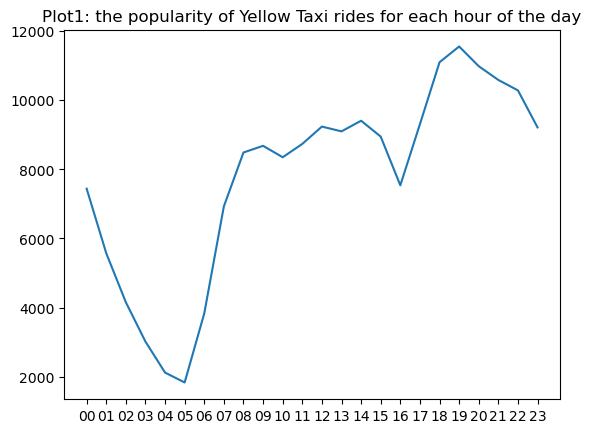

In [301]:
def plot_hourly():
    df = get_hourly_popularity()
    df = df.sort_values(by='hour', ascending=True)
    plt.title("Plot1: the popularity of Yellow Taxi rides for each hour of the day")
    x_axis = df['hour']
    y_axis = df['count']
    plt.plot(x_axis, y_axis)
    plt.show()

plot_hourly()

#### 2. Create a visualization that shows the average distance traveled per month (regardless of year - so group by each month) for both taxis and Ubers combined. Include the 90% confidence interval around the mean in the visualization.

In [302]:
def combined_data():
    query = """
    SELECT strftime('%m', pickup_datetime) AS month, AVG(distance) as avg_dis
    FROM taxi_data
    GROUP BY month
    UNION ALL
    SELECT strftime('%m', pickup_datetime) AS month,  AVG(distance) as avg_dis 
    FROM uber_data
    GROUP BY month
    """
    df = pd.read_sql_query(query, engine)
    grouped_df = df.groupby('month').mean()
    return grouped_df

In [303]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = data.mean()
    std_dev = data.std(ddof=1)
    t_value = 1.645 
    std_error = std_dev / math.sqrt(n)
    lower = mean - t_value * std_error
    upper = mean + t_value * std_error
    return (mean, lower, upper)


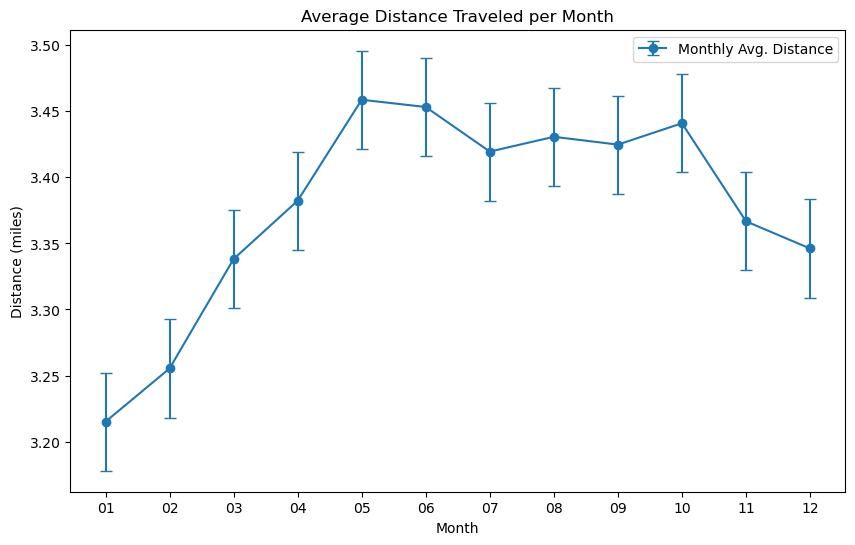

In [319]:
def plot_monthly_avg_distance(data):
    means = data['avg_dis']
    mean, lower, upper = confidence_interval(means)

    plt.figure(figsize=(10, 6))
    plt.errorbar(data.index, data['avg_dis'], yerr=(upper-lower)/2, fmt='o-', capsize=4, label='Monthly Avg. Distance')
    plt.title('Average Distance Traveled per Month')
    plt.xlabel('Month')
    plt.ylabel('Distance (miles)')
    plt.legend()
    plt.show()


data = combined_data()
plot_monthly_avg_distance(data)


#### 3. Define three lat/long coordinate boxes around the three major New York airports: LGA, JFK, and EWR. Create a visualization that compares what day of the week was most popular for drop offs for each airport. 

In [315]:
def dropoff_data(database_path):
    connection = sqlite3.connect(database_path)
    
    LGA = (40.760813, -73.903141, 40.787463, -73.841343)
    JFK = (40.639722, -73.794853, 40.671111, -73.776944) 
    EWR = (40.671199, -74.181919, 40.707710, -74.174336)

    base_query = """
        SELECT * FROM (
            SELECT pickup_datetime,passenger_count, pickup_latitude,pickup_longitude, distance, dropoff_latitude, dropoff_longitude FROM uber_data
            UNION ALL
            SELECT pickup_datetime, passenger_count, pickup_latitude,pickup_longitude, distance, dropoff_latitude, dropoff_longitude FROM taxi_data
        ) WHERE
    """

    lga_query = f"""
        {base_query}
            (dropoff_latitude BETWEEN {LGA[0]} AND {LGA[2]} AND dropoff_longitude BETWEEN {LGA[1]} AND {LGA[3]});
    """
    jfk_query = f"""
        {base_query}
            (dropoff_latitude BETWEEN {JFK[0]} AND {JFK[2]} AND dropoff_longitude BETWEEN {JFK[1]} AND {JFK[3]});
    """
    ewr_query = f"""
        {base_query}
            (dropoff_latitude BETWEEN {EWR[0]} AND {EWR[2]} AND dropoff_longitude BETWEEN {EWR[1]} AND {EWR[3]});
    """

    lga_df = pd.read_sql_query(lga_query, connection)
    jfk_df = pd.read_sql_query(jfk_query, connection)
    ewr_df = pd.read_sql_query(ewr_query, connection)

    connection.close()

    return lga_df, jfk_df, ewr_df

database_path = "project.db"
lga_df, jfk_df, ewr_df = dropoff_data(database_path)


In [317]:
def count_customers_by_day(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['day_of_week'] = df['pickup_datetime'].dt.day_name()
    return df.groupby('day_of_week')['passenger_count'].sum()

lga_counts = count_customers_by_day(lga_df)
jfk_counts = count_customers_by_day(jfk_df)
ewr_counts = count_customers_by_day(ewr_df)

new_df = pd.concat([lga_counts,jfk_counts,ewr_counts])

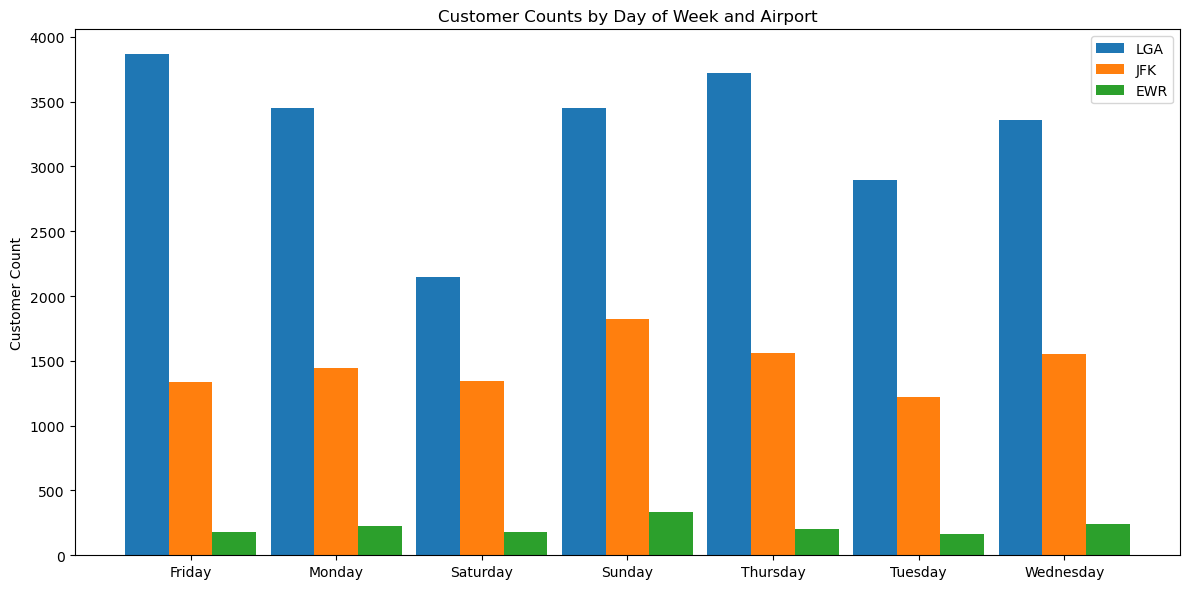

In [318]:
def plot_customer_counts(lga_counts, jfk_counts, ewr_counts):
    labels = lga_counts.index.intersection(jfk_counts.index).intersection(ewr_counts.index)
    lga_values = lga_counts[labels].values
    jfk_values = jfk_counts[labels].values
    ewr_values = ewr_counts[labels].values

    x = np.arange(len(labels))
    width = 0.3

    fig, ax = plt.subplots(figsize=(12, 6))
    rects1 = ax.bar(x - width, lga_values, width, label='LGA')
    rects2 = ax.bar(x, jfk_values, width, label='JFK')
    rects3 = ax.bar(x + width, ewr_values, width, label='EWR')

    ax.set_ylabel('Customer Count')
    ax.set_title('Customer Counts by Day of Week and Airport')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()


plot_customer_counts(lga_counts, jfk_counts, ewr_counts)

#### 5. Create a scatter plot that compares tip amount versus distance for Yellow Taxi rides. You may remove any outliers how you see fit.


In [264]:
def get_tip():
    
    tip_query = """
    SELECT tip_amount, distance
    FROM taxi_data
    WHERE tip_amount < 25 AND distance > 0 AND distance < 25;
    """
    
    df = pd.read_sql_query(tip_query, engine)
    return df



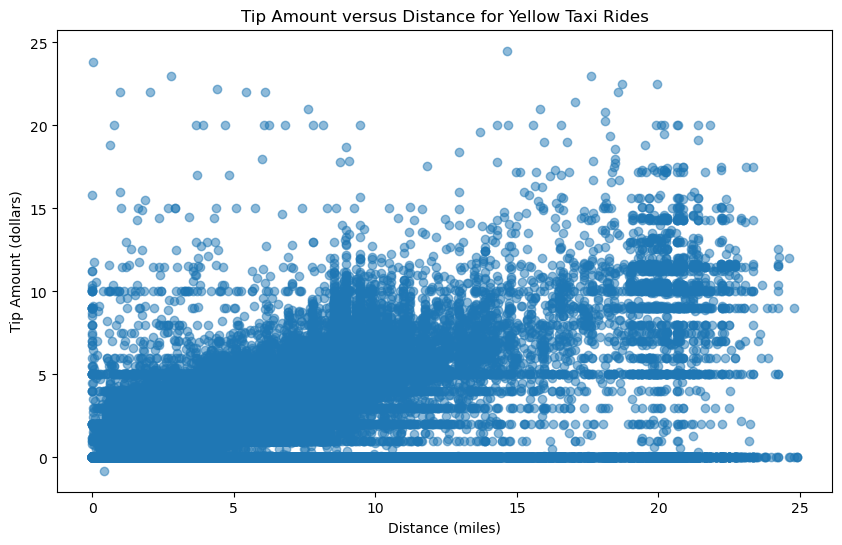

In [320]:
def plot_tip_vs_distance(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['distance'], df['tip_amount'], alpha=0.5)
    plt.title('Tip Amount versus Distance for Yellow Taxi Rides')
    plt.xlabel('Distance (miles)')
    plt.ylabel('Tip Amount (dollars)')
    plt.show()


df = get_tip()
plot_tip_vs_distance(df)


#### 6. Create another scatter plot that compares tip amount versus precipitation amount for Yellow Taxi rides. You may remove any outliers how you see fit

In [297]:
def get_tip_precipitation():
    tp_query = """
    SELECT strftime('%Y-%m-%d %H', pickup_datetime) AS date, tip_amount 
    FROM taxi_data
    WHERE tip_amount > 0 AND tip_amount < 20
    """
    pre_query = """
    SELECT strftime('%Y-%m-%d %H', date) AS date, DailyPrecipitation
    FROM daily_data
    WHERE DailyPrecipitation < 7.5
    """
    df1 = pd.read_sql_query(tp_query, engine)
    df2 = pd.read_sql_query(pre_query, engine)
    
    df2 = df2[df2['DailyPrecipitation'] != 0]
    
    merged_df = pd.merge(df1, df2, on='date')
    
    
    return merged_df



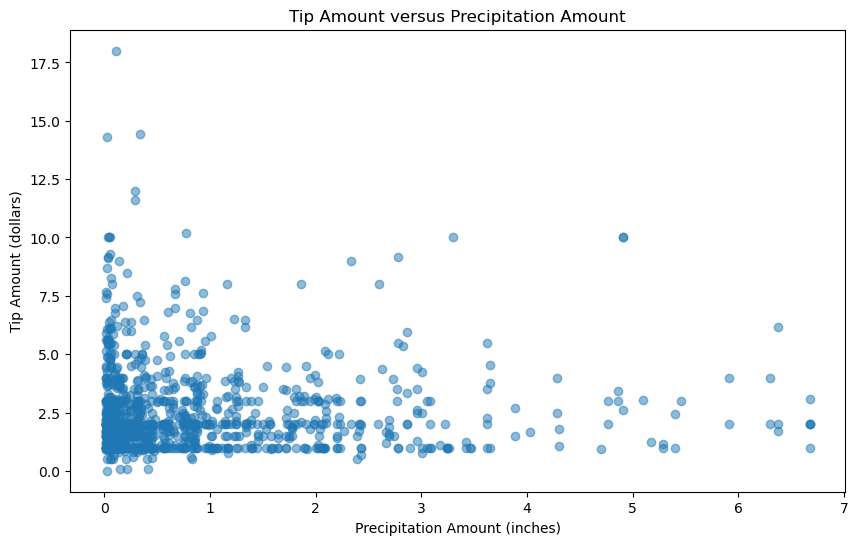

In [321]:
def plot_tip_vs_precipitation(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['DailyPrecipitation'], df['tip_amount'], alpha=0.5)
    plt.title('Tip Amount versus Precipitation Amount')
    plt.xlabel('Precipitation Amount (inches)')
    plt.ylabel('Tip Amount (dollars)')
    plt.show()


df = get_tip_precipitation()
plot_tip_vs_precipitation(df)
